# Méthode avec Faster R-CNN


In [4]:
import tensorflow as tf
import cv2
import numpy as np
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import os



In [ ]:
model_url = "https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1"
model = hub.load(model_url)

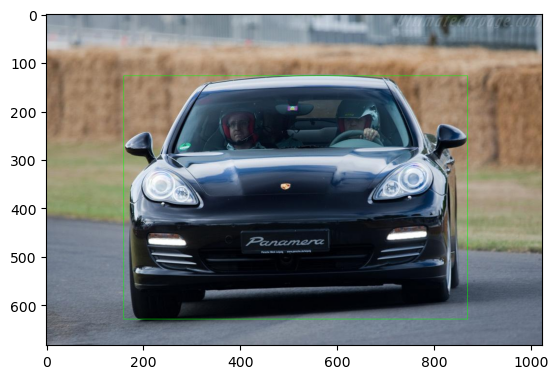

In [25]:
# Charger et prétraiter votre image
path = "train"
image_test = path + "/" + np.random.choice(os.listdir('train'))
image = cv2.imread(image_test)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = tf.convert_to_tensor(image)

# Effectuer la détection d'objets
input_tensor = image[tf.newaxis, ...]
detections = model(input_tensor)

# Récupérer les informations de détection (bounding boxes, classes, scores)
boxes = detections['detection_boxes'][0].numpy()
classes = detections['detection_classes'][0].numpy().astype(int)
scores = detections['detection_scores'][0].numpy()

# On fait le paris que une seule voiture -> on prend l'objet le mieux détecté
# Sinon on aurait pu mettre un seuil de détection
score = scores[0] 
box = boxes[0]
classe = classes[0]
# print(box) #coordonnées relatives 

y1, x1, y2, x2 = box #le y avant le x pk pas 
(x1, y1) = (int(x1 * image.shape[1]), int(y1 * image.shape[0])) #coordonées absolues
(x2, y2) = (int(x2 * image.shape[1]), int(y2 * image.shape[0]))

image_with_boxes = image.numpy().copy()
cv2.rectangle(image_with_boxes, pt1 = (x1, y1), pt2 = (x2, y2), 
              color = (0, 255, 0) , thickness = 1)

plt.imshow(image_with_boxes);